In [1]:
import os
from scipy import io
import numpy as np
import pandas as pd
import mne
from mne import concatenate_epochs, concatenate_raws
from mne_bids import BIDSPath, read_raw_bids
%config InlineBackend.figure_format='retina'
from collections import Counter
from tqdm import tqdm
from itertools import product
import operator
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data/thingseeg2/raw_bids/'
subjects = ['{:02d}'.format(x) for x in range(1,11)]
sessions = ['{:02d}'.format(x) for x in range(1,5)]
runs = ['{:02d}'.format(x) for x in range(1,6)]

In [ ]:
raw_list = []
for session, run in tqdm(product(sessions, runs), total=len(sessions)*len(runs)):
    beh_path = BIDSPath(
        subject=subjects[0],
        session=session,
        task='train',
        root=data_dir,
        run = run,
        datatype="beh",
        suffix='beh'
    )
    beh_data = io.loadmat(str(beh_path.fpath) + '.mat')['data']
    events_beh = np.asarray(beh_data[0][0][2]['tot_img_number'][0], dtype=int) - 1
    # events_beh = np.array(['stim/' + item for item in events_beh.astype(str)])
    events_beh = np.array(['stim/' + item for item in np.char.zfill(events_beh.astype(str), 5)]) # Outputs: ['04000' '00500' '00060' '00007']

    eeg_path = BIDSPath(
        subject=subjects[0],
        session=session,
        task='train',
        root=data_dir,
        run = run,
        datatype="eeg",
    )
    raw = read_raw_bids(eeg_path, verbose='ERROR')
    raw.annotations.description[1:] = events_beh
    # raw.annotations.rename({'stim/-1':'catch'})
    raw.annotations.rename({'stim/-0001':'catch'})
    raw.annotations.delete(0) # delete the "new segment" event
    raw.resample(100)

    raw_list.append(raw)

100%|██████████| 20/20 [04:12<00:00, 12.61s/it]


In [4]:
raws = concatenate_raws(raw_list, on_mismatch="ignore", preload=True)

In [5]:
events, event_dict = mne.events_from_annotations(raws)
epochs = mne.Epochs(raws, events, event_id=event_dict, tmin=-0.2, tmax=1.0, baseline=(-0.2, 0), preload=True)

Used Annotations descriptions: ['catch', 'stim/00000', 'stim/00001', 'stim/00002', 'stim/00003', 'stim/00004', 'stim/00005', 'stim/00006', 'stim/00007', 'stim/00008', 'stim/00009', 'stim/00010', 'stim/00011', 'stim/00012', 'stim/00013', 'stim/00014', 'stim/00015', 'stim/00016', 'stim/00017', 'stim/00018', 'stim/00019', 'stim/00020', 'stim/00021', 'stim/00022', 'stim/00023', 'stim/00024', 'stim/00025', 'stim/00026', 'stim/00027', 'stim/00028', 'stim/00029', 'stim/00030', 'stim/00031', 'stim/00032', 'stim/00033', 'stim/00034', 'stim/00035', 'stim/00036', 'stim/00037', 'stim/00038', 'stim/00039', 'stim/00040', 'stim/00041', 'stim/00042', 'stim/00043', 'stim/00044', 'stim/00045', 'stim/00046', 'stim/00047', 'stim/00048', 'stim/00049', 'stim/00050', 'stim/00051', 'stim/00052', 'stim/00053', 'stim/00054', 'stim/00055', 'stim/00056', 'stim/00057', 'stim/00058', 'stim/00059', 'stim/00060', 'stim/00061', 'stim/00062', 'stim/00063', 'stim/00064', 'stim/00065', 'stim/00066', 'stim/00067', 'stim/0

In [6]:
epochs.equalize_event_counts(method='truncate')

Dropped 1036 epochs: 843, 1072, 1434, 1451, 2051, 2081, 2117, 2212, 2412, 2638, 2858, 2881, 3048, 3195, 3432, 3593, 3757, 3784, 4111, 4459, 4647, 4678, 4737, 4743, 4865, 5178, 5615, 5657, 5949, 6050, 6462, 6569, 6765, 6782, 6862, 6969, 7058, 7761, 7870, 7882, 7938, 8569, 8682, 8931, 9305, 9432, 9722, 9769, 10007, 10023, 10389, 10513, 10583, 10703, 10854, 11127, 11563, 11607, 11826, 11879, 12112, 12245, 12512, 12564, 12949, 13022, 13128, 13164, 13672, 13823, 14171, 14242, 14395, 14452, 14765, 15032, 15087, 15387, 15533, 15618, 15706, 15721, 16130, 16279, 16443, 16472, 16834, 17471, 17504, 17603, 17647, 17856, 17923, 18259, 18357, 18766, 18970, 19011, 19336, 19605, 19755, 19928, 20088, 20127, 20271, 20522, 20549, 20841, 20889, 21272, 21582, 21702, 21869, 22137, 22142, 22264, 22548, 22674, 22778, 23145, 23227, 23487, 23631, 23722, 23955, 24203, 24372, 24449, 24707, 25133, 25162, 25211, 25378, 25596, 26158, 26388, 26425, 26608, 26666, 26847, 26972, 26986, 27230, 27299, 27477, 27863, 28142,

(<Epochs |  66164 events (all good), -0.2 – 1 s, baseline -0.2 – 0 s, ~3.76 GB, data loaded,
  'catch': 4
  'stim/00000': 4
  'stim/00001': 4
  'stim/00002': 4
  'stim/00003': 4
  'stim/00004': 4
  'stim/00005': 4
  'stim/00006': 4
  'stim/00007': 4
  'stim/00008': 4
  and 16531 more events ...>,
 array([  843,  1072,  1434, ..., 53653, 67129, 50346]))

In [7]:
epochs_np = epochs.get_data()

/tmp/ipykernel_3566674/1890800845.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_np = epochs.get_data()


In [8]:
epochs_np.shape

(66164, 63, 121)

In [9]:
epochs.events[:, 2]

array([21743, 18222, 15880, ..., 22898, 13076, 11740])

In [10]:
i_event_dict = {v: k for k, v in event_dict.items()}

In [11]:
events_list = [i_event_dict[i] for i in epochs.events[:, 2]]

In [12]:
# Sort the list and get the indices
sorted_list = sorted(enumerate(events_list), key=lambda x: x[1])

# Extract the sorted indices and values
sorted_indices, sorted_values = zip(*sorted_list)

In [17]:
np.array(sorted_indices)

array([   66,   124,   746, ..., 26921, 51120, 51537])

In [18]:
epochs_np = epochs_np[np.array(sorted_indices)]
epochs_np = epochs_np[4:]
epochs_np.shape

(66160, 63, 121)

In [27]:
epochs_np = epochs_np.reshape((16540, 4, 63, 121))

In [30]:
epochs_np = epochs_np[:,:,:,:120]
epochs_np.shape

(16540, 4, 63, 120)

In [31]:
epochs_np_avg = epochs_np.mean(1)

In [36]:
train_thingseeg2_avg = epochs_np_avg[:,:,20:]
np.save('../data/thingseeg2/train_thingseeg2_avg1_mvnn.npy', train_thingseeg2_avg)
np.save('../data/thingseeg2/train_thingseeg2_avg1_200ms_mvnn.npy', train_thingseeg2_avg[:,:,:20])
np.save('../data/thingseeg2/train_thingseeg2_avg1_400ms_mvnn.npy', train_thingseeg2_avg[:,:,:40])
np.save('../data/thingseeg2/train_thingseeg2_avg1_600ms_mvnn.npy', train_thingseeg2_avg[:,:,:60])
np.save('../data/thingseeg2/train_thingseeg2_avg1_800ms_mvnn.npy', train_thingseeg2_avg[:,:,:80])

In [3]:
raw_list = []
for session in tqdm(sessions, total=len(sessions)):
    beh_path = BIDSPath(
        subject=subjects[0],
        session=session,
        task='test',
        root=data_dir,
        datatype="beh",
        suffix='beh'
    )
    beh_data = io.loadmat(str(beh_path.fpath) + '.mat')['data']
    events_beh = np.asarray(beh_data[0][0][2]['tot_img_number'][0], dtype=int) - 1
    # events_beh = np.array(['stim/' + item for item in events_beh.astype(str)])
    events_beh = np.array(['stim/' + item for item in np.char.zfill(events_beh.astype(str), 5)]) # Outputs: ['04000' '00500' '00060' '00007']

    eeg_path = BIDSPath(
        subject=subjects[0],
        session=session,
        task='test',
        root=data_dir,
        datatype="eeg",
    )
    raw = read_raw_bids(eeg_path, verbose='ERROR')

    raw.annotations.description[1:] = events_beh
    # raw.annotations.rename({'stim/-1':'catch'})
    raw.annotations.rename({'stim/-0001':'catch'})
    raw.annotations.delete(0) # delete the "new segment" event
    raw.resample(100)

    raw_list.append(raw)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [01:11<00:00, 17.78s/it]


In [5]:
from sklearn.discriminant_analysis import _cov

In [4]:
raw.get_data().shape

(63, 124262)

In [44]:
raws = concatenate_raws(raw_list, on_mismatch="ignore", preload=True)

In [45]:
events, event_dict = mne.events_from_annotations(raws)
epochs = mne.Epochs(raws, events, event_id=event_dict, tmin=-0.2, tmax=1.0, baseline=(-0.2, 0), preload=True)

Used Annotations descriptions: ['catch', 'stim/00000', 'stim/00001', 'stim/00002', 'stim/00003', 'stim/00004', 'stim/00005', 'stim/00006', 'stim/00007', 'stim/00008', 'stim/00009', 'stim/00010', 'stim/00011', 'stim/00012', 'stim/00013', 'stim/00014', 'stim/00015', 'stim/00016', 'stim/00017', 'stim/00018', 'stim/00019', 'stim/00020', 'stim/00021', 'stim/00022', 'stim/00023', 'stim/00024', 'stim/00025', 'stim/00026', 'stim/00027', 'stim/00028', 'stim/00029', 'stim/00030', 'stim/00031', 'stim/00032', 'stim/00033', 'stim/00034', 'stim/00035', 'stim/00036', 'stim/00037', 'stim/00038', 'stim/00039', 'stim/00040', 'stim/00041', 'stim/00042', 'stim/00043', 'stim/00044', 'stim/00045', 'stim/00046', 'stim/00047', 'stim/00048', 'stim/00049', 'stim/00050', 'stim/00051', 'stim/00052', 'stim/00053', 'stim/00054', 'stim/00055', 'stim/00056', 'stim/00057', 'stim/00058', 'stim/00059', 'stim/00060', 'stim/00061', 'stim/00062', 'stim/00063', 'stim/00064', 'stim/00065', 'stim/00066', 'stim/00067', 'stim/0

In [46]:
epochs.equalize_event_counts(method='truncate')

Dropped 240 epochs: 13379, 13383, 13813, 14031, 14382, 14490, 14585, 14799, 14895, 15161, 15274, 15282, 15319, 15324, 15385, 15405, 15500, 15516, 15528, 15571, 15592, 15598, 15606, 15615, 15627, 15638, 15651, 15676, 15704, 15724, 15728, 15736, 15748, 15759, 15774, 15779, 15794, 15799, 15801, 15818, 15830, 15831, 15835, 15837, 15838, 15843, 15844, 15854, 15861, 15872, 15875, 15878, 15883, 15884, 15885, 15889, 15892, 15905, 15909, 15921, 15924, 15932, 15934, 15940, 15943, 15947, 15949, 15952, 15955, 15956, 15958, 15960, 15961, 15965, 15975, 15976, 15987, 15992, 15994, 16003, 16007, 16011, 16015, 16019, 16030, 16031, 16037, 16039, 16043, 16046, 16051, 16060, 16062, 16067, 16074, 16079, 16082, 16084, 16088, 16093, 16094, 16102, 16105, 16106, 16108, 16110, 16113, 16117, 16118, 16119, 16122, 16123, 16125, 16131, 16132, 16133, 16134, 16135, 16138, 16140, 16141, 16152, 16153, 16155, 16156, 16158, 16159, 16162, 16168, 16169, 16170, 16173, 16174, 16175, 16177, 16179, 16180, 16181, 16182, 16185, 

(<Epochs |  16080 events (all good), -0.2 – 1 s, baseline -0.2 – 0 s, ~935.3 MB, data loaded,
  'catch': 80
  'stim/00000': 80
  'stim/00001': 80
  'stim/00002': 80
  'stim/00003': 80
  'stim/00004': 80
  'stim/00005': 80
  'stim/00006': 80
  'stim/00007': 80
  'stim/00008': 80
  and 191 more events ...>,
 array([13379, 13383, 13813, 14031, 14382, 14490, 14585, 14799, 15161,
        15274, 15319, 15324, 15571, 15837, 15921, 16226, 16185, 16108,
        16074, 16235, 16270, 16132, 16267, 16318, 15831, 14895, 15992,
        16308, 16196, 16117, 16214, 16268, 16251, 16152, 16168, 16317,
        15878, 16221, 16031, 16245, 15889, 16246, 16135, 16273, 15844,
        16264, 16093, 16175, 16191, 16279, 16141, 15909, 16294, 15615,
        16159, 16217, 15843, 16188, 16173, 15835, 15987, 16158, 16313,
        16303, 15838, 16102, 15724, 15961, 16293, 15861, 16215, 16280,
        16094, 16254, 15932, 15976, 16315, 16138, 16285, 16118, 16155,
        16305, 16106, 16297, 16153, 15385, 15500, 1627

In [47]:
epochs_np = epochs.get_data()

/tmp/ipykernel_3566674/1890800845.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_np = epochs.get_data()


In [48]:
i_event_dict = {v: k for k, v in event_dict.items()}
events_list = [i_event_dict[i] for i in epochs.events[:, 2]]
# Sort the list and get the indices
sorted_list = sorted(enumerate(events_list), key=lambda x: x[1])

# Extract the sorted indices and values
sorted_indices, sorted_values = zip(*sorted_list)

In [49]:
epochs_np = epochs_np[np.array(sorted_indices)]
epochs_np = epochs_np[80:]
epochs_np.shape

(16000, 63, 121)

In [50]:
epochs_np = epochs_np.reshape((200, 80, 63, 121))

In [51]:
epochs_np = epochs_np[:,:,:,:120]
epochs_np.shape

(200, 80, 63, 120)

In [52]:
epochs_np_avg = epochs_np.mean(1)

In [ ]:
test_thingseeg2_avg = epochs_np_avg[:,:,20:]
np.save('../data/thingseeg2/test_thingseeg2_avg1_mvnn.npy', test_thingseeg2_avg)
np.save('../data/thingseeg2/test_thingseeg2_avg1_200ms_mvnn.npy', test_thingseeg2_avg[:,:,:20])
np.save('../data/thingseeg2/test_thingseeg2_avg1_400ms_mvnn.npy', test_thingseeg2_avg[:,:,:40])
np.save('../data/thingseeg2/test_thingseeg2_avg1_600ms_mvnn.npy', test_thingseeg2_avg[:,:,:60])
np.save('../data/thingseeg2/test_thingseeg2_avg1_800ms_mvnn.npy', test_thingseeg2_avg[:,:,:80])

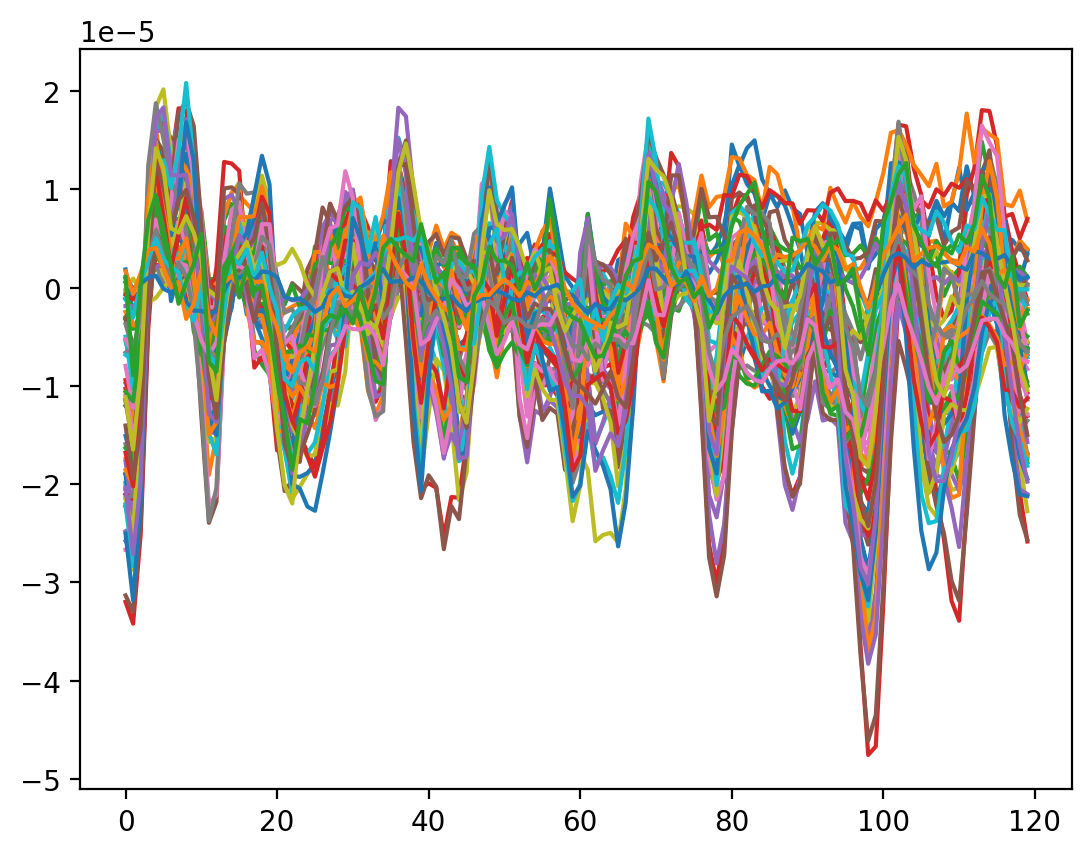

In [32]:
plt.plot(epochs_np_avg[0].T)

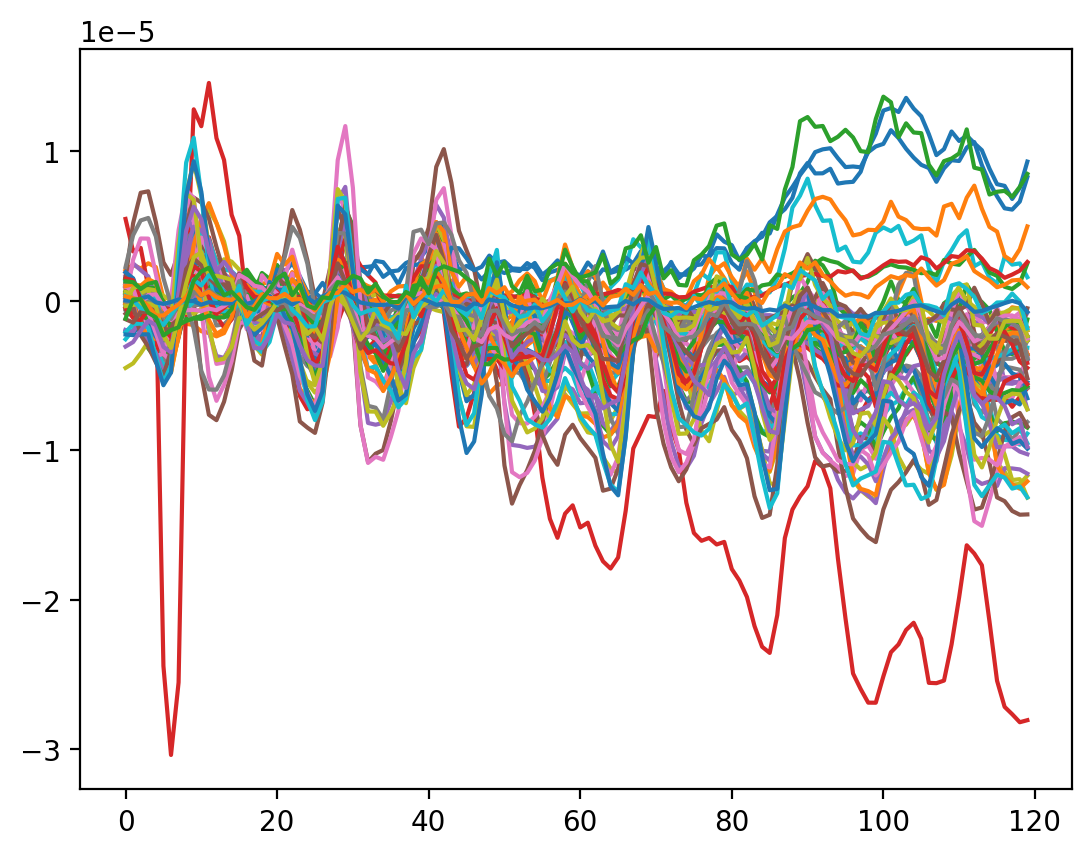

In [53]:
plt.plot(epochs_np_avg[0].T)

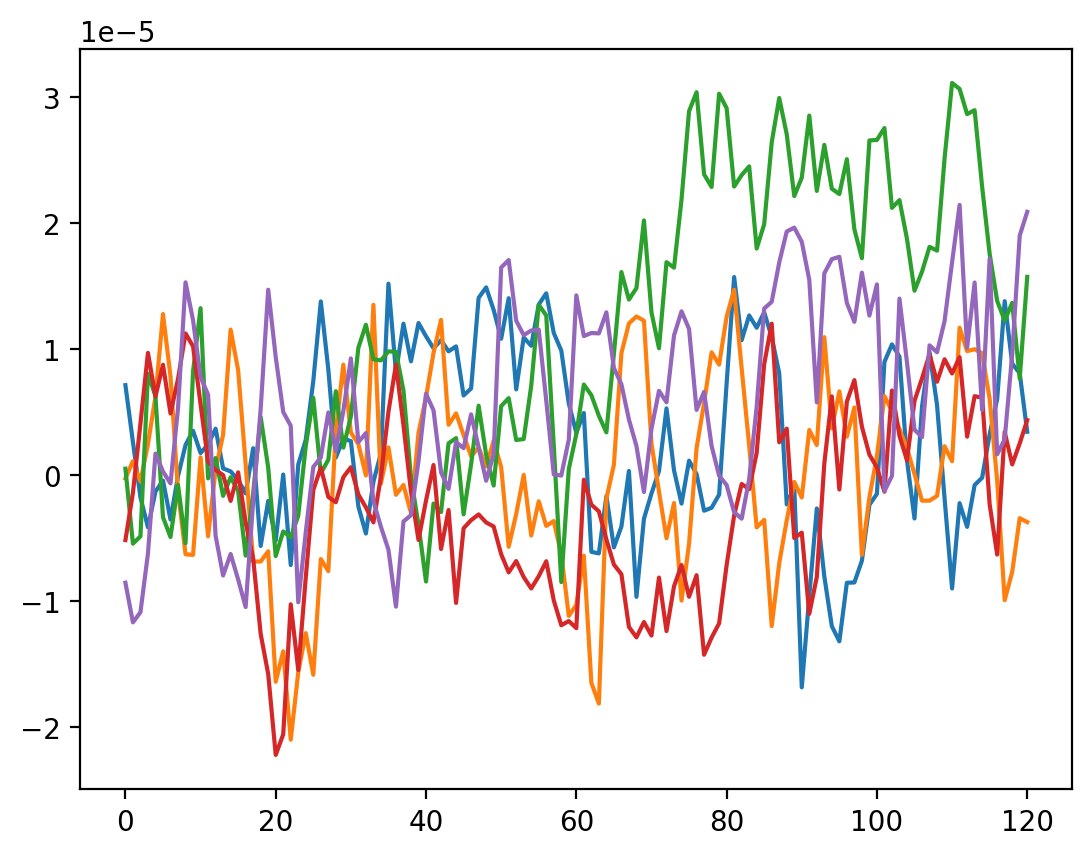

In [28]:
plt.plot(epochs_np[0,0, 0, :])
plt.plot(epochs_np[0,1, 0, :])
plt.plot(epochs_np[0,2, 0, :])
plt.plot(epochs_np[0,3, 0, :])
plt.plot(epochs_np[1,0, 0, :])

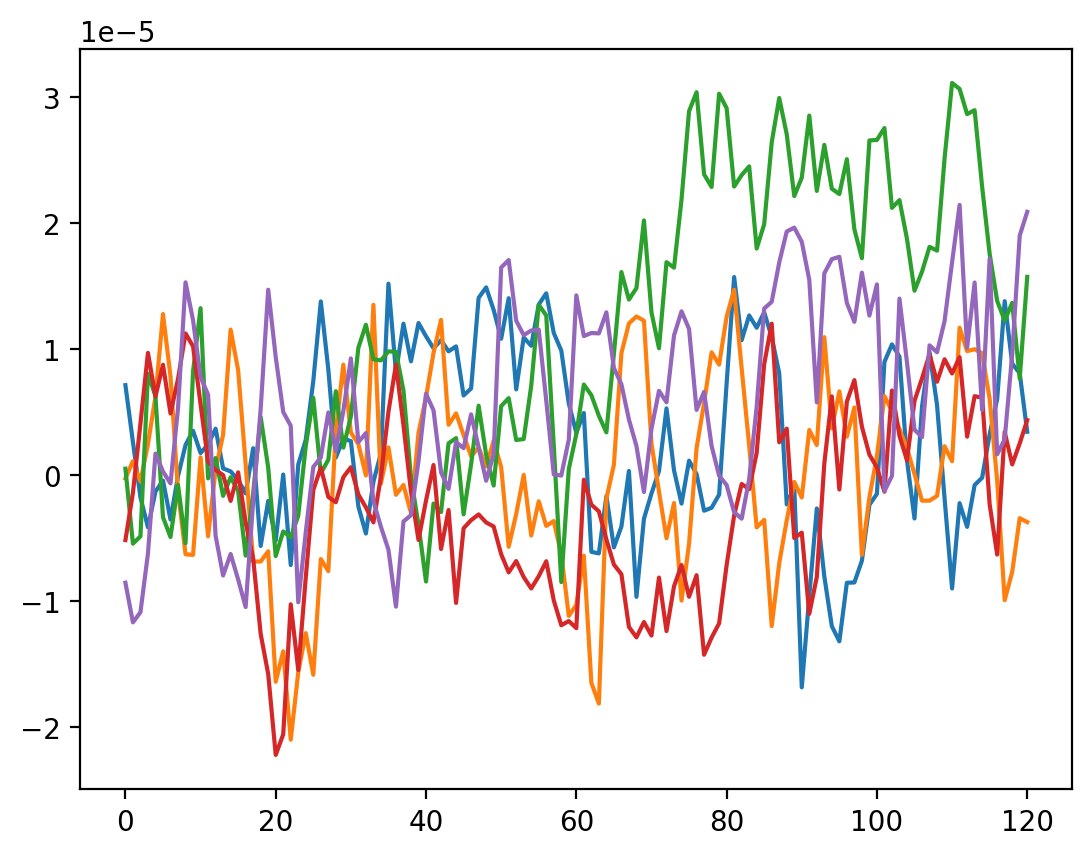

In [25]:
plt.plot(epochs_np[0, 0, :])
plt.plot(epochs_np[1, 0, :])
plt.plot(epochs_np[2, 0, :])
plt.plot(epochs_np[3, 0, :])
plt.plot(epochs_np[4, 0, :])

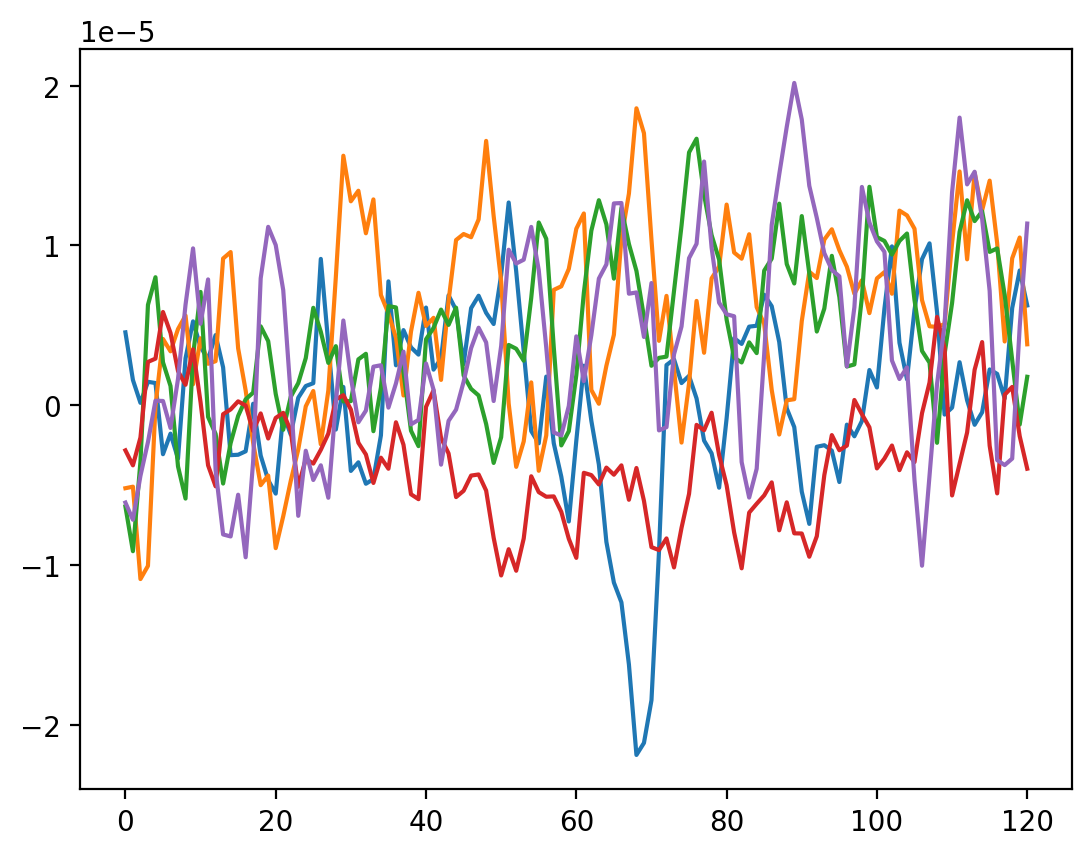

In [29]:
plt.plot(epochs_np[0,0, 1, :])
plt.plot(epochs_np[0,1, 1, :])
plt.plot(epochs_np[0,2, 1, :])
plt.plot(epochs_np[0,3, 1, :])
plt.plot(epochs_np[1,0, 1, :])

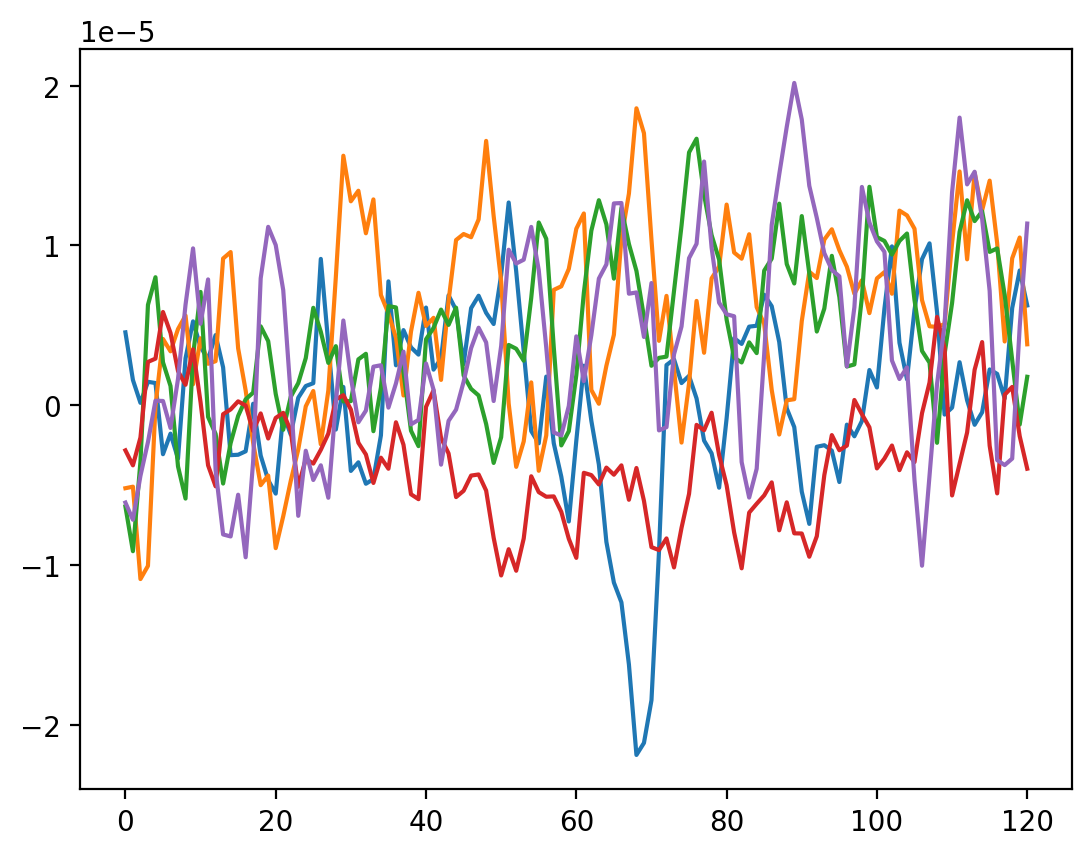

In [26]:
plt.plot(epochs_np[0, 1, :])
plt.plot(epochs_np[1, 1, :])
plt.plot(epochs_np[2, 1, :])
plt.plot(epochs_np[3, 1, :])
plt.plot(epochs_np[4, 1, :])

In [21]:
np.array(sorted_values)[4:].reshape((16540, 4))

array([['stim/00000', 'stim/00000', 'stim/00000', 'stim/00000'],
       ['stim/00001', 'stim/00001', 'stim/00001', 'stim/00001'],
       ['stim/00002', 'stim/00002', 'stim/00002', 'stim/00002'],
       ...,
       ['stim/16537', 'stim/16537', 'stim/16537', 'stim/16537'],
       ['stim/16538', 'stim/16538', 'stim/16538', 'stim/16538'],
       ['stim/16539', 'stim/16539', 'stim/16539', 'stim/16539']],
      dtype='<U10')

In [13]:
Counter(sorted_values)

Counter({'catch': 4,
         'stim/00000': 4,
         'stim/00001': 4,
         'stim/00002': 4,
         'stim/00003': 4,
         'stim/00004': 4,
         'stim/00005': 4,
         'stim/00006': 4,
         'stim/00007': 4,
         'stim/00008': 4,
         'stim/00009': 4,
         'stim/00010': 4,
         'stim/00011': 4,
         'stim/00012': 4,
         'stim/00013': 4,
         'stim/00014': 4,
         'stim/00015': 4,
         'stim/00016': 4,
         'stim/00017': 4,
         'stim/00018': 4,
         'stim/00019': 4,
         'stim/00020': 4,
         'stim/00021': 4,
         'stim/00022': 4,
         'stim/00023': 4,
         'stim/00024': 4,
         'stim/00025': 4,
         'stim/00026': 4,
         'stim/00027': 4,
         'stim/00028': 4,
         'stim/00029': 4,
         'stim/00030': 4,
         'stim/00031': 4,
         'stim/00032': 4,
         'stim/00033': 4,
         'stim/00034': 4,
         'stim/00035': 4,
         'stim/00036': 4,
         'stim/00

In [14]:
len(sorted_values)

66164

In [15]:
sorted_values

('catch',
 'catch',
 'catch',
 'catch',
 'stim/00000',
 'stim/00000',
 'stim/00000',
 'stim/00000',
 'stim/00001',
 'stim/00001',
 'stim/00001',
 'stim/00001',
 'stim/00002',
 'stim/00002',
 'stim/00002',
 'stim/00002',
 'stim/00003',
 'stim/00003',
 'stim/00003',
 'stim/00003',
 'stim/00004',
 'stim/00004',
 'stim/00004',
 'stim/00004',
 'stim/00005',
 'stim/00005',
 'stim/00005',
 'stim/00005',
 'stim/00006',
 'stim/00006',
 'stim/00006',
 'stim/00006',
 'stim/00007',
 'stim/00007',
 'stim/00007',
 'stim/00007',
 'stim/00008',
 'stim/00008',
 'stim/00008',
 'stim/00008',
 'stim/00009',
 'stim/00009',
 'stim/00009',
 'stim/00009',
 'stim/00010',
 'stim/00010',
 'stim/00010',
 'stim/00010',
 'stim/00011',
 'stim/00011',
 'stim/00011',
 'stim/00011',
 'stim/00012',
 'stim/00012',
 'stim/00012',
 'stim/00012',
 'stim/00013',
 'stim/00013',
 'stim/00013',
 'stim/00013',
 'stim/00014',
 'stim/00014',
 'stim/00014',
 'stim/00014',
 'stim/00015',
 'stim/00015',
 'stim/00015',
 'stim/00015',


In [53]:
# Counter(epochs.annotations.description)

In [41]:
# epochs.save('../data/thingseeg2/epochs_eeg_sub1_epo.fif.gz',split_naming='bids')

Splitting into 10 parts


In [43]:
# all_epochs = mne.read_epochs('../data/thingseeg2/epochs_eeg_sub1_split-01_epo.fif.gz',preload=True)

In [32]:
# Counter(raws.annotations.description)

In [30]:
# beh_list = []
# for session, run in tqdm(product(sessions, runs), total=len(sessions)*len(runs)):
#     bids_path = BIDSPath(
#         subject=subjects[0],
#         session=session,
#         task='train',
#         root=data_dir,
#         run = run,
#         datatype="beh",
#         suffix='beh'
#     )
#     beh_data = io.loadmat(str(bids_path.fpath) + '.mat')['data']
#     events_beh = np.asarray(beh_data[0][0][2]['tot_img_number'][0], dtype=int) - 1
#     events_beh = ['stim/' + item for item in events_beh.astype(str)]
#     beh_list.extend(events_beh)

In [17]:
bids_path = BIDSPath(
    subject=subjects[0],
    session=sessions[0],
    task='train',
    root=data_dir,
    run = runs[0],
    datatype="eeg",
)

In [18]:
raw = read_raw_bids(bids_path, verbose='ERROR')
# np.unique(raw.annotations.to_data_frame().to_numpy()[:,2])
# np.unique(raw.annotations.description)
# Counter(raw.annotations.description)
raw.annotations.description
# raw.annotations

array(['New Segment/', 'Stimulus/S 11', 'Stimulus/S 82', ...,
       'Stimulus/S 16', 'Stimulus/S 15', 'Stimulus/S 11'], dtype='<U13')

In [26]:
raw.annotations.delete(0)

In [27]:
raw.annotations

<Annotations | 3360 segments: catch (18), stim/0 (1), stim/10021 (2), ...>

In [200]:
# eeg_data = mne.io.read_raw_brainvision('../data/thingseeg2_raw/sub-01/ses-01/eeg/sub-01_ses-01_task-train_run-01_eeg.vhdr', preload=True)

In [201]:
# events_samples, _ = mne.events_from_annotations(raw)
# events_samples = events_samples[1:,0]
# events_samples

In [202]:
# raw.plot(start=14.8, duration=1.2);

In [203]:
# Counter(raw.annotations.description)

In [204]:
# raw.annotations[pd.Series(raw.annotations.description).str.contains('Stimulus/S255')].onset

In [20]:
bids_path = BIDSPath(
    subject=subjects[0],
    session=sessions[0],
    task='train',
    root=data_dir,
    run = runs[0],
    # part = '01',
    datatype="beh",
    suffix='beh',
    # extension='.mat'
)
# os.path.join(bids_path.fpath, '.mat')

# str(bids_path.fpath) + '.mat'
beh_data = io.loadmat(str(bids_path.fpath) + '.mat')['data']

In [24]:
events_beh = np.asarray(beh_data[0][0][2]['tot_img_number'][0], dtype=int) - 1
# events_beh = np.array(['stim/' + item for item in events_beh.astype(str)])
events_beh = np.array(['stim/' + item for item in np.char.zfill(events_beh.astype(str), 5)]) # Outputs: ['04000' '00500' '00060' '00007']
events_beh

array(['stim/11741', 'stim/08220', 'stim/05878', ..., 'stim/16252',
       'stim/15269', 'stim/11968'], dtype='<U10')

In [30]:
Counter(events_beh).keys()

dict_keys(['stim/11741', 'stim/08220', 'stim/05878', 'stim/03608', 'stim/13716', 'stim/00740', 'stim/07304', 'stim/16159', 'stim/11266', 'stim/03343', 'stim/03577', 'stim/10670', 'stim/03693', 'stim/10598', 'stim/11582', 'stim/14441', 'stim/07602', 'stim/02504', 'stim/06635', 'stim/08257', 'stim/01387', 'stim/02406', 'stim/07371', 'stim/16318', 'stim/11707', 'stim/01599', 'stim/06026', 'stim/02534', 'stim/07401', 'stim/15299', 'stim/07712', 'stim/04343', 'stim/10735', 'stim/16369', 'stim/06774', 'stim/15233', 'stim/08221', 'stim/01436', 'stim/11186', 'stim/09515', 'stim/08067', 'stim/11260', 'stim/04230', 'stim/10547', 'stim/00495', 'stim/07593', 'stim/01951', 'stim/10043', 'stim/12463', 'stim/00344', 'stim/05337', 'stim/06066', 'stim/03101', 'stim/06171', 'stim/10297', 'stim/11001', 'stim/13902', 'stim/11773', 'stim/07744', 'stim/01454', 'stim/00312', 'stim/09762', 'stim/01202', 'stim/03482', 'stim/07197', 'stim/07512', 'stim/-0001', 'stim/04834', 'stim/10775', 'stim/10805', 'stim/149

In [33]:
dict(sorted(Counter(events_beh).items(), key=operator.itemgetter(1), reverse=True))

{'stim/-0001': 18,
 'stim/03608': 2,
 'stim/03343': 2,
 'stim/10598': 2,
 'stim/11582': 2,
 'stim/07371': 2,
 'stim/11707': 2,
 'stim/10735': 2,
 'stim/09515': 2,
 'stim/11260': 2,
 'stim/01454': 2,
 'stim/09847': 2,
 'stim/13811': 2,
 'stim/16039': 2,
 'stim/08452': 2,
 'stim/14025': 2,
 'stim/14180': 2,
 'stim/05147': 2,
 'stim/09984': 2,
 'stim/00424': 2,
 'stim/06525': 2,
 'stim/11262': 2,
 'stim/10445': 2,
 'stim/07511': 2,
 'stim/06854': 2,
 'stim/03464': 2,
 'stim/03695': 2,
 'stim/12257': 2,
 'stim/04863': 2,
 'stim/01749': 2,
 'stim/06048': 2,
 'stim/08303': 2,
 'stim/09242': 2,
 'stim/01203': 2,
 'stim/06858': 2,
 'stim/02160': 2,
 'stim/01886': 2,
 'stim/07838': 2,
 'stim/03355': 2,
 'stim/08296': 2,
 'stim/01902': 2,
 'stim/15650': 2,
 'stim/06392': 2,
 'stim/05374': 2,
 'stim/08738': 2,
 'stim/04775': 2,
 'stim/07640': 2,
 'stim/15246': 2,
 'stim/05716': 2,
 'stim/16158': 2,
 'stim/14747': 2,
 'stim/11309': 2,
 'stim/03981': 2,
 'stim/03012': 2,
 'stim/04844': 2,
 'stim/03

In [207]:
# events_beh.astype(str)


In [208]:
raw.annotations.description[1:] = events_beh.astype(str)
raw.annotations.rename({'stim/-1':'catch'})

<Annotations | 3361 segments: New Segment/ (1), catch (18), stim/0 (1), ...>

In [209]:
Counter(raw.annotations.description)

Counter({'New Segment/': 1,
         'stim/11741': 1,
         'stim/8220': 1,
         'stim/5878': 1,
         'stim/3608': 2,
         'stim/13716': 1,
         'stim/740': 1,
         'stim/7304': 1,
         'stim/16159': 1,
         'stim/11266': 1,
         'stim/3343': 2,
         'stim/3577': 1,
         'stim/10670': 1,
         'stim/3693': 1,
         'stim/10598': 2,
         'stim/11582': 2,
         'stim/14441': 1,
         'stim/7602': 1,
         'stim/2504': 1,
         'stim/6635': 1,
         'stim/8257': 1,
         'stim/1387': 1,
         'stim/2406': 1,
         'stim/7371': 2,
         'stim/16318': 1,
         'stim/11707': 2,
         'stim/1599': 1,
         'stim/6026': 1,
         'stim/2534': 1,
         'stim/7401': 1,
         'stim/15299': 1,
         'stim/7712': 1,
         'stim/4343': 1,
         'stim/10735': 2,
         'stim/16369': 1,
         'stim/6774': 1,
         'stim/15233': 1,
         'stim/8221': 1,
         'stim/1436': 1,
         

In [210]:
raw.annotations.description

array(['New Segment/', 'stim/11741', 'stim/8220', ..., 'stim/16252',
       'stim/15269', 'stim/11968'], dtype='<U12')

In [226]:
events, event_dict = mne.events_from_annotations(raw)
# reject = dict(eeg=40e6)      # unit: V (EEG channels) 40e-6
# epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=1.0, baseline=(-0.2, 0), preload=True, reject_by_annotation=False, reject=reject)
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=1.0, baseline=(-0.2, 0), preload=True)

Used Annotations descriptions: ['New Segment/', 'catch', 'stim/0', 'stim/10021', 'stim/10022', 'stim/10023', 'stim/10025', 'stim/10027', 'stim/10029', 'stim/10041', 'stim/10043', 'stim/10046', 'stim/10047', 'stim/10061', 'stim/10063', 'stim/10064', 'stim/10067', 'stim/10082', 'stim/10086', 'stim/10087', 'stim/1010', 'stim/1012', 'stim/1013', 'stim/1014', 'stim/10141', 'stim/10148', 'stim/10149', 'stim/10150', 'stim/10158', 'stim/10180', 'stim/10185', 'stim/10188', 'stim/10197', 'stim/10198', 'stim/1020', 'stim/10201', 'stim/10203', 'stim/10206', 'stim/10207', 'stim/1021', 'stim/1023', 'stim/10231', 'stim/10233', 'stim/10234', 'stim/10236', 'stim/10239', 'stim/10240', 'stim/10241', 'stim/10249', 'stim/10260', 'stim/10261', 'stim/10262', 'stim/10266', 'stim/10267', 'stim/10268', 'stim/10269', 'stim/1028', 'stim/1029', 'stim/10293', 'stim/10297', 'stim/10298', 'stim/10310', 'stim/10315', 'stim/10340', 'stim/10341', 'stim/10342', 'stim/10344', 'stim/10348', 'stim/10355', 'stim/10359', 'sti

Not setting metadata
3361 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3361 events and 1201 original time points ...
1 bad epochs dropped


In [231]:
epochs['stim'].get_data().shape

/tmp/ipykernel_2587086/2674224615.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs['stim'].get_data().shape


(3342, 63, 1201)

In [248]:
epochs['stim'][0]

Number of events,1
Events,stim/11741: 1
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


In [163]:
beh_data[0][0][2]['tot_img_number']

array([[array([[11742]], dtype=uint16), array([[8221]], dtype=uint16),
        array([[5879]], dtype=uint16), ...,
        array([[16253]], dtype=uint16), array([[15270]], dtype=uint16),
        array([[11969]], dtype=uint16)]], dtype=object)

In [164]:
np.where(events_beh == 0)[0]

array([916])

In [165]:
beh_data[0][0][2]['category_name']

array([[array(['01175_roller_coaster'], dtype='<U20'),
        array(['00823_lingerie'], dtype='<U14'),
        array(['00588_gel'], dtype='<U9'), ...,
        array(['01626_wine_bottle'], dtype='<U17'),
        array(['01527_tripod'], dtype='<U12'),
        array(['01197_saltshaker'], dtype='<U16')]], dtype=object)

In [166]:
np.array([item[0][0] for item in beh_data[0][0][2]['trigger_1'][0]])

array([11, 82, 58, ..., 16, 15, 11], dtype=uint8)

In [167]:
trigger = ['Stimulus/S ' + str(item[0][0]) for item in beh_data[0][0][2]['trigger_1'][0]]

In [169]:
category = [item[0] for item in beh_data[0][0][2]['category_name'][0]]

In [170]:
rename_dict = dict(zip(trigger, events_beh.astype(str)))
rename_dict.pop('Stimulus/S 255')
rename_dict['Stimulus/S  1'] = rename_dict['Stimulus/S 1']
rename_dict['Stimulus/S  4'] = rename_dict['Stimulus/S 4']
rename_dict['Stimulus/S  7'] = rename_dict['Stimulus/S 7']
rename_dict['Stimulus/S  9'] = rename_dict['Stimulus/S 9']
rename_dict.pop('Stimulus/S 1')
rename_dict.pop('Stimulus/S 4')
rename_dict.pop('Stimulus/S 7')
rename_dict.pop('Stimulus/S 9')

'8'

In [98]:
raw.annotations.rename(rename_dict)

<Annotations | 3361 segments: 0 (1), 10408 (248), 11968 (233), 1262 (209), ...>

In [79]:
# Counter(raw.annotations.description)